### Introduction
The goal of this project is to predict the type of physical activity using tri-axial smartphone accelerometer data. The dataset used for training contains two files: the first contains the columns [timestamp, UTC time, accuracy, x, y, z] completed with values, and the second contains the columns [timestamp, UTC time, label] completed with values. Two analogous files exist, with the second file missing completed 'label' values; these two files are the data we will predict with our model. The key steps that were performed for this project were as follows:
1) Import and Clean the Known Data
2) Plot known data and outcomes in a 3D scatter plot for initial visualization
3) Split known data and outcomes into train data and test data for model experimentation
4) Experiment with three different models: Logistic Regression, Random Forest Classifier, and kNN predictor
5) Choose the best-performing model and refit the model
6) Import and Clean the data to be predicted
7) Predict outcomes and store them in a CSV file

In [51]:
# Code to import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import datetime

### Methods
1) First, the known data is imported using the pandas module. All unnecessary columns are removed, and any rows without corresponding timestamps between the time-series file and the label file are removed. What is left is a 125-row by 4-column matrix with the timestamps as the indices. The columns in this matrix are [x, y, z, label] with no NaN values in the matrix. I will treat the timestamp indices similar to id numbers; the x, y, and z columns as the covariates; and the label column is the outcomes. A classification model will be used for this project.
2) Second, I plotted the data on a 3D scatter plot for initial data visualization, using the matplotlib.pyplot module. From this 3D scatterplot, there seems to be no obvious correlation between the x, y, and z accelerations and the type of physical activity.
3) Next, I used the sci-kit-learn library to split my cleaned data into training data and testing data for my models. A training size of 80% was chosen due to a small sample size of 125 observations.
4) I then created a Logistic Regression model and tested its performance. I first used cross-validation with folds set to 10 for initial testing. Next, I fitted the Logistic Regression model with my training data and tested its accuracy with my test data. Both the cross-validation and test accuracy gave scores of around 55% consistently.
5) I then created a Random Forest Classifier model, with max_depth = 4 for improved performance, and tested its performance. I first used cross-validation with folds set to 10 for initial testing. Next, I fitted the Random Forest Classifier model with my training data and tested its accuracy with my test data. Both the cross-validation and test accuracy gave scores of around 60% consistently.
6) I then created a kNN predictor model, with the number of neighbors = 5 for improved performance, and tested its performance. I first used cross-validation with folds set to 10 for initial testing. Next, I fitted the kNN predictor model with my training data and tested its accuracy with my test data. Both the cross-validation and test accuracy gave scores of around 60%; however, much less consistent than the Random Forest Classifier model.

Based on the performance results of the three models, I ended up choosing the Random Forest Classifier model because it produced the highest score consistently. Note: other hyperparameters were used for all three models in experimentation; however, all additional hyperparameters did not have a noticeable impact on the accuracy scores.

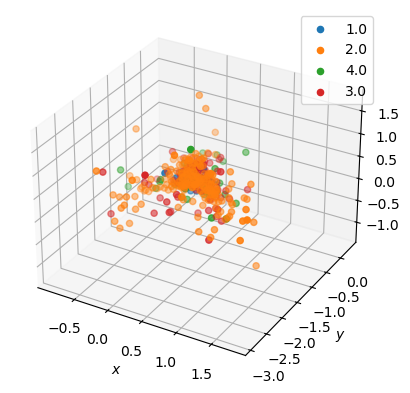

Cross validation score for Logistic Regression: 0.5466666666666666
Test accuracy score for Logistic Regression: 0.5333333333333333
Cross validation score for Random Forest Classifier: 0.6033333333333333
Test accuracy score for Random Forest Classifier: 0.6133333333333333
Cross validation score for kNN predictor: 0.5599999999999999
Test accuracy score for kNN predictor: 0.6133333333333333


In [53]:
# MY TESTING SCRIPT

# Import and Clean the Data
complete_covariates = pd.read_csv("train_time_series.csv", index_col = "timestamp").drop(columns = ["Unnamed: 0", "UTC time", "accuracy"])
complete_outcomes = pd.read_csv("train_labels.csv", index_col = "timestamp").drop(columns = ["Unnamed: 0", "UTC time"])
complete_data = pd.concat([complete_covariates,complete_outcomes], axis=1).dropna(axis=0, how="any")

# Plot known data and outcomes in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
outcomes = pd.unique(complete_data.label)
for outcome in outcomes:
    x, y, z = complete_data.x[complete_data.label == outcome], complete_data.y[complete_data.label == outcome], complete_data.z[complete_data.label == outcome]
    ax.scatter(x, y, z, label=outcome)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.legend()
plt.show()

# Split known data and outcomes into train data and test data
X_train, X_test, y_train, y_test = train_test_split(complete_data.iloc[:, 0:3], complete_data.iloc[:, 3], train_size = 0.80)

# Create Logistic Regression model and test performance
clf = LogisticRegression()
logistic_regression_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(f"Cross validation score for Logistic Regression: {np.mean(logistic_regression_scores)}")

clf.fit(X_train, y_train)
print(f"Test accuracy score for Logistic Regression: {clf.score(X_test, y_test)}")

# Create Random Forest Classifier model and test performance
forest_classifier = RandomForestClassifier(max_depth = 4)
forest_classification_scores = cross_val_score(forest_classifier, X_train, y_train, cv=10)
print(f"Cross validation score for Random Forest Classifier: {np.mean(forest_classification_scores)}")

forest_classifier.fit(X_train, y_train)
print(f"Test accuracy score for Random Forest Classifier: {forest_classifier.score(X_test, y_test)}")

# Create kNN predictor and test performance
knn = KNeighborsClassifier(n_neighbors = 5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=10)
print(f"Cross validation score for kNN predictor: {np.mean(knn_scores)}")

knn.fit(X_train, y_train)
print(f"Test accuracy score for kNN predictor: {knn.score(X_test, y_test)}")

### Results
After choosing to use a Random Forest Classifier model, the entire code is rewritten so the elapsed time it takes to obtain the predictions can be observed. The data is imported and cleaned in the same way as before. A Random Forest Classifier model is then created, with max_depth = 4, and it is fit with all the known data to increase performance. The data we will make predictions for is then imported and cleaned with the pandas module in a similar way as before; only the observations with timestamps that exist in both the time-series file and the label file are stored and will be used for predictions. Lastly, the predictions are made and exported to the CSV file "predicted_outcomes.csv". The total elapsed time from start to finish is about 0.31 seconds.

When submitting my results to the edX time, my accuracy was 43.2%. This percentage is significantly lower than my experimental scores; however, it is still greater than 25%, the expected accuracy score if I guessed for each observation.

In [90]:
# Store start time
start_time = datetime.datetime.today()

# Import and Clean the Known Data 
complete_covariates = pd.read_csv("train_time_series.csv", index_col = "timestamp").drop(columns = ["Unnamed: 0", "UTC time", "accuracy"])
complete_outcomes = pd.read_csv("train_labels.csv", index_col = "timestamp").drop(columns = ["Unnamed: 0", "UTC time"])
complete_data = pd.concat([complete_covariates,complete_outcomes], axis=1).dropna(axis=0, how="any")

# Create Random Forest Classifier Model and Fit it with Known Data
forest_classifier = RandomForestClassifier(max_depth = 4)
forest_classifier.fit(complete_data.iloc[:, 0:3], complete_data.iloc[:, 3])

# Import and Clean the Data to be Predicted
to_pred_outcomes = pd.read_csv("test_labels.csv")
list_of_timestamps = to_pred_outcomes["timestamp"]
to_pred_covariates = pd.read_csv("test_time_series.csv", index_col = "timestamp").drop(columns = ["Unnamed: 0", "UTC time", "accuracy"])
to_pred_covariates = to_pred_covariates[to_pred_covariates.index.isin(list_of_timestamps)]

# Predict Outcomes and Export to CSV File
predicted_outcomes = pd.Series(forest_classifier.predict(to_pred_covariates))
predicted_outcomes.to_csv("predicted_outcomes.csv")

# Compute Time-Elapsed
end_time = datetime.datetime.today()
print(end_time-start_time)

0:00:00.315818


### Conclusion
My final test accuracy was 43.2%, significantly lower than what I expected. This result may be because my model did not have a sufficient amount of data observations to properly train it. One solution to this is generating synthetic data and using it to train my model. Another future improvement is to use more complex machine learning algorithms, requiring my studies to continue.